# Monitor the training process


## 1. Formulate / Outline the problem

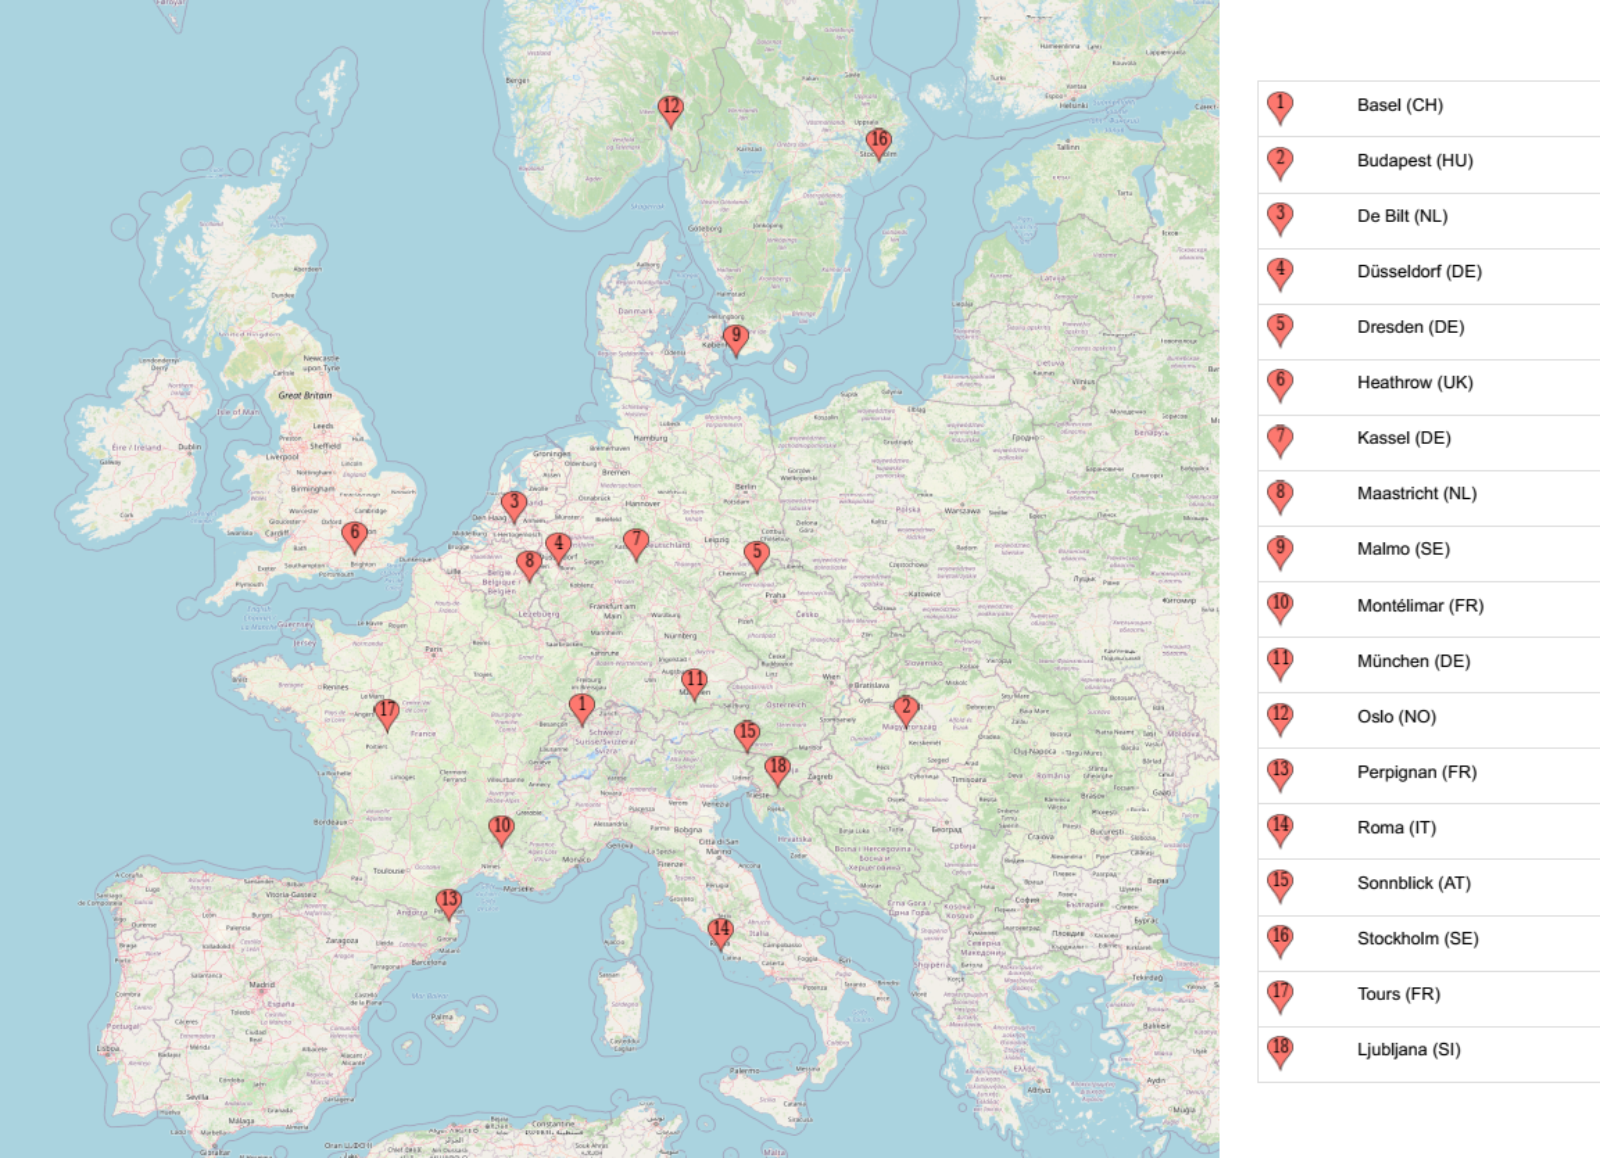

Goal: Predict the number of sunshine hours for tomorrow in Basel based on the weather of today

## 2. Identify inputs and outputs

In [7]:
import pandas as pd

In [8]:
# filename = "https://zenodo.org/record/5071376/files/weather_prediction_dataset_light.csv?download=1"

filename = "weather_prediction_dataset_light.csv"
data = pd.read_csv(filename)
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


## Exercise: Explore the dataset

Let's get a quick idea of the dataset.

* How many data points do we have?
* How many features does the data have (don't count month and date as a feature)?
* What are the different types of measurements (humidity etc.) in the data and how many are there?
* (Optional) Plot the amount of sunshine hours in Basel over the course of a year. Are there any interesting properties that you notice?

date).


In [9]:
data.shape

(3654, 91)

In [10]:
import string
print({x.lstrip(string.ascii_uppercase + "_") for x in data.columns if x not in ["MONTH", "DATE"]})

{'temp_max', 'pressure', 'temp_mean', 'global_radiation', 'sunshine', 'temp_min', 'cloud_cover', 'precipitation', 'humidity'}


<Axes: xlabel='Day', ylabel='Basel sunchine hours'>

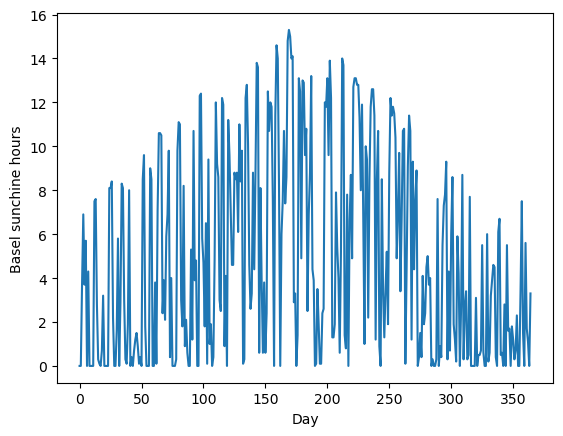

In [11]:
data.iloc[:365]['BASEL_sunshine'].plot(xlabel="Day",ylabel="Basel sunchine hours")

## 3. Prepare data

In [12]:
nr_rows = 365 * 3

In [13]:
X_data = data.loc[:nr_rows]
X_data = X_data.drop(columns=['DATE', 'MONTH']) # features

In [14]:
y_data = data.loc[1:(nr_rows + 1)]["BASEL_sunshine"] # labels

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

In [17]:
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size=0.5, random_state=0)

## 4. Choose a pretrained model or start building architecture from scratch

## Exercise: architecture of the network
As we want to design a neural network architecture for a regression task, see if you can first come up with the answers to the following questions:

1. What must be the dimension of our input layer?
2. We want to output the prediction of a single number. The output layer of the NN hence cannot be the same as for the classification task earlier. This is because the softmax activation being used had a concrete meaning with respect to the class labels which is not needed here. What output layer design would you choose for regression? Hint: A layer with relu activation, with sigmoid activation or no activation at all?
3. (Optional) How would we change the model if we would like to output a prediction of the precipitation in Basel in addition to the sunshine hours?

In [18]:
# 89 features, so 89 input neurons
# 1 output neuron with no activation function (or linear activation function)

In [19]:
from tensorflow import keras

2023-05-24 12:13:22.418336: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-24 12:13:22.420618: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 12:13:22.478439: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 12:13:22.479722: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 12:13:23.298890: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [20]:
def create_nn():
    inputs = keras.Input(shape=(X_data.shape[1],), name='input')
    
    # Dense layers
    layers_dense = keras.layers.Dense(100, 'relu')(inputs)
    layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)
    
    # Output layer
    outputs = keras.layers.Dense(1)(layers_dense)
    
    return keras.Model(inputs=inputs, outputs=outputs, name='weather_prediction_model')
    


In [21]:
model = create_nn()

In [22]:
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 89)]              0         
                                                                 
 dense (Dense)               (None, 100)               9000      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 14,101
Trainable params: 14,101
Non-trainable params: 0
_________________________________________________________________


## 5. Choose a loss function and optimizer

In [23]:
model.compile(loss="mse")

In [24]:
model.compile(loss="mse", optimizer="adam")

In [25]:
def compile_model(model):
    model.compile(loss="mse", 
                  optimizer="adam", 
                  metrics=[keras.metrics.RootMeanSquaredError()])

In [26]:
compile_model(model)

## 6. Train the model

In [27]:
history = model.fit(X_train, y_train,
              batch_size=32,
              epochs=200,
              verbose=0)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_history(metrics):
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("RMSE")

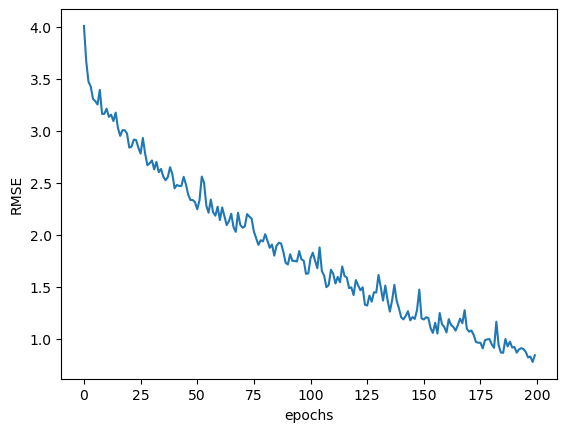

In [29]:
plot_history("root_mean_squared_error")

## 7. Perform Prediction

In [30]:
y_train_predicted = model.predict(X_train)

24/24 [==============================] - 0s 1ms/step


In [31]:
y_test_predicted = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


## 8. Measure performance

In [32]:
def plot_predictions(y_pred, y_true, title):
    plt.scatter(y_pred, y_true, s=10, alpha=0.5)
    plt.xlabel("Predicted sunshine hours")
    plt.ylabel("True sunshine hours")
    plt.title(title)

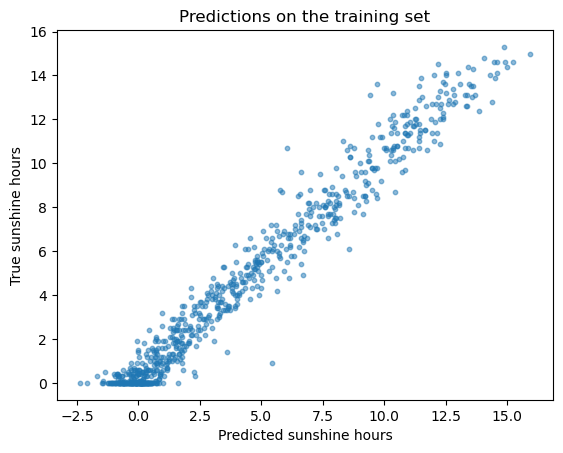

In [33]:
plot_predictions(y_train_predicted, y_train, title="Predictions on the training set")

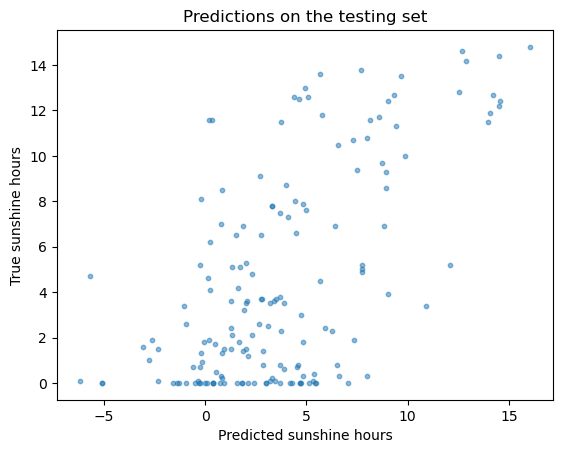

In [34]:
plot_predictions(y_test_predicted, y_test, title="Predictions on the testing set")

### Reflecting on our results
* Is the performance of the model as you expected (or better/worse)?
* Is there a noteable difference between training set and test set? And if so, any idea why?
* (Optional) When developing a model, you will often vary different aspects of your model like which features you use, model parameters and architecture. It is important to settle on a single-number evaluation metric to compare your models. What single-number evaluation metric would you choose here and why?

In [35]:
train_metrics = model.evaluate(X_train, y_train, return_dict=True)

24/24 [==============================] - 0s 1ms/step - loss: 0.8070 - root_mean_squared_error: 0.8983


In [36]:
# ?model.evaluate

In [37]:
test_metrics = model.evaluate(X_test, y_test, return_dict=True)

6/6 [==============================] - 0s 2ms/step - loss: 15.3781 - root_mean_squared_error: 3.9215


In [38]:
train_metrics

{'loss': 0.8069643974304199, 'root_mean_squared_error': 0.898311972618103}

In [39]:
test_metrics

{'loss': 15.378128051757812, 'root_mean_squared_error': 3.9214956760406494}

## 9. Tune hyperparameters

In [40]:
y_baseline_prediction = X_test['BASEL_sunshine']

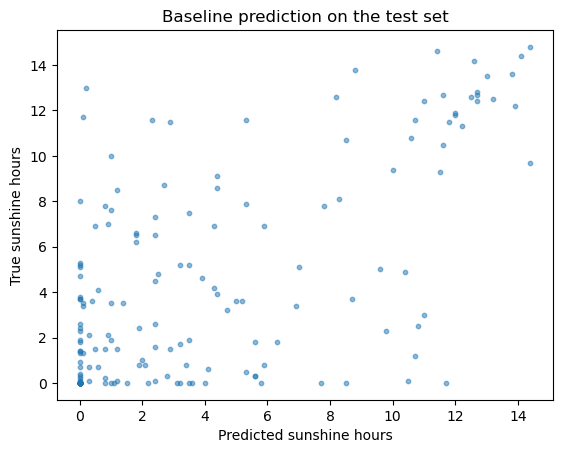

In [41]:
plot_predictions(y_baseline_prediction, y_test, title="Baseline prediction on the test set")

In [42]:
from sklearn.metrics import mean_squared_error
rmse_baseline = mean_squared_error(y_test, y_baseline_prediction, squared=False)

In [43]:
rmse_baseline

3.877323350410224

In [44]:
test_metrics['root_mean_squared_error']

3.9214956760406494

### Baseline

* Looking at this baseline: Would you consider this a simple or a hard problem to solve?
* (Optional) Can you think of other baselines?

### Test vs Validation

In [45]:
model = create_nn()

In [46]:
??create_nn

Signature: create_nn()
Docstring: <no docstring>
Source:   
def create_nn():
    inputs = keras.Input(shape=(X_data.shape[1],), name='input')
    
    # Dense layers
    layers_dense = keras.layers.Dense(100, 'relu')(inputs)
    layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)
    
    # Output layer
    outputs = keras.layers.Dense(1)(layers_dense)
    
    return keras.Model(inputs=inputs, outputs=outputs, name='weather_prediction_model')
File:      /tmp/ipykernel_225808/3188037081.py
Type:      function

In [47]:
compile_model(model)

In [48]:
history = model.fit(X_train, y_train,
             batch_size = 32,
             epochs = 200,
             validation_data=(X_val, y_val))

Epoch 1/200
24/24 [==============================] - 1s 8ms/step - loss: 15.8774 - root_mean_squared_error: 3.9846 - val_loss: 11.1361 - val_root_mean_squared_error: 3.3371
Epoch 2/200
24/24 [==============================] - 0s 3ms/step - loss: 12.3770 - root_mean_squared_error: 3.5181 - val_loss: 10.6047 - val_root_mean_squared_error: 3.2565
Epoch 3/200
24/24 [==============================] - 0s 3ms/step - loss: 14.4253 - root_mean_squared_error: 3.7981 - val_loss: 10.7925 - val_root_mean_squared_error: 3.2852
Epoch 4/200
24/24 [==============================] - 0s 3ms/step - loss: 12.3141 - root_mean_squared_error: 3.5091 - val_loss: 10.5701 - val_root_mean_squared_error: 3.2512
Epoch 5/200
24/24 [==============================] - 0s 4ms/step - loss: 11.5515 - root_mean_squared_error: 3.3987 - val_loss: 12.6637 - val_root_mean_squared_error: 3.5586
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 11.0667 - root_mean_squared_error: 3.3267 - val_loss: 10.3886 

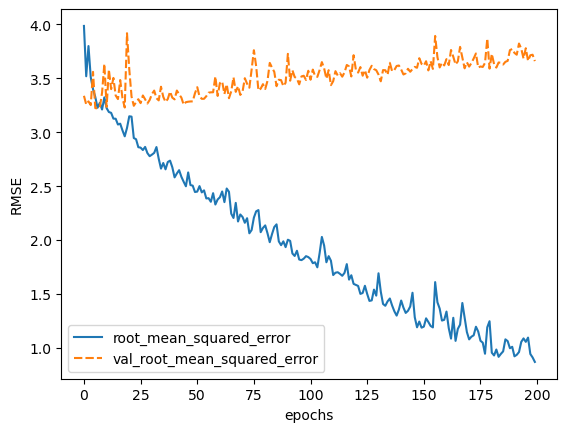

In [49]:
plot_history(['root_mean_squared_error', 'val_root_mean_squared_error'])

### Plot the training progress

* Is there a difference between the training and validation data? And if so, what would this imply?
* (Optional) Take a pen and paper, draw the perfect training and validation curves. (This may seem trivial, but it will trigger you to think about what you actually would like to see)

### Counteract model overfitting
### Try to reduce the degree of overfitting by lowering the number of parameters.

We can keep the network architecture unchanged (2 dense layers + a one-node output layer) and only play with the number of nodes per layer. Try to lower the number of nodes in one or both of the two dense layers and observe the changes to the training and validation losses. If time is short: Suggestion is to run one network with only 10 and 5 nodes in the first and second layer.

* Is it possible to get rid of overfitting this way?
* Does the overall performance suffer or does it mostly stay the same?
* How low can you go with the number of parameters without notable effect on the performance on the validation set?

In [50]:
def create_nn(nodes1=100, nodes2=50):
    inputs = keras.Input(shape=(X_data.shape[1],), name='input')
    
    # Dense layers
    layers_dense = keras.layers.Dense(nodes1, 'relu')(inputs)
    layers_dense = keras.layers.Dense(nodes2, 'relu')(layers_dense)
    
    # Output layer
    outputs = keras.layers.Dense(1)(layers_dense)
    
    return keras.Model(inputs=inputs, outputs=outputs, name='model_small')
    

In [51]:
model = create_nn(10,5)

In [52]:
model.summary()

Model: "model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 89)]              0         
                                                                 
 dense_6 (Dense)             (None, 10)                900       
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [53]:
compile_model(model)

In [54]:
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200
24/24 [==============================] - 1s 7ms/step - loss: 26.5820 - root_mean_squared_error: 5.1558 - val_loss: 21.8331 - val_root_mean_squared_error: 4.6726
Epoch 2/200
24/24 [==============================] - 0s 3ms/step - loss: 19.0329 - root_mean_squared_error: 4.3627 - val_loss: 16.1162 - val_root_mean_squared_error: 4.0145
Epoch 3/200
24/24 [==============================] - 0s 3ms/step - loss: 15.8942 - root_mean_squared_error: 3.9868 - val_loss: 15.1864 - val_root_mean_squared_error: 3.8970
Epoch 4/200
24/24 [==============================] - 0s 3ms/step - loss: 15.1812 - root_mean_squared_error: 3.8963 - val_loss: 13.7087 - val_root_mean_squared_error: 3.7025
Epoch 5/200
24/24 [==============================] - 0s 3ms/step - loss: 14.7565 - root_mean_squared_error: 3.8414 - val_loss: 13.3780 - val_root_mean_squared_error: 3.6576
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 14.1708 - root_mean_squared_error: 3.7644 - val_loss: 13.6018 

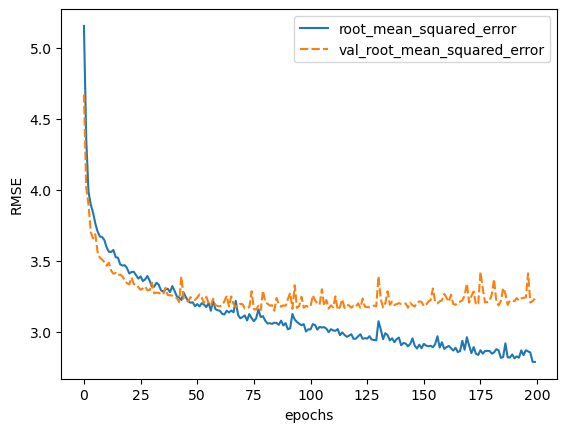

In [55]:
plot_history(['root_mean_squared_error','val_root_mean_squared_error'])

## Early stopping

In [62]:
model = create_nn(10,5)

In [63]:
compile_model(model)

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
earlystopper = EarlyStopping(
                    monitor = "val_loss",
                    patience = 10)

In [66]:
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=200, 
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper])

Epoch 1/200
24/24 [==============================] - 1s 7ms/step - loss: 19.5321 - root_mean_squared_error: 4.4195 - val_loss: 14.9416 - val_root_mean_squared_error: 3.8654
Epoch 2/200
24/24 [==============================] - 0s 3ms/step - loss: 16.0530 - root_mean_squared_error: 4.0066 - val_loss: 13.5688 - val_root_mean_squared_error: 3.6836
Epoch 3/200
24/24 [==============================] - 0s 3ms/step - loss: 14.8991 - root_mean_squared_error: 3.8599 - val_loss: 12.8761 - val_root_mean_squared_error: 3.5883
Epoch 4/200
24/24 [==============================] - 0s 3ms/step - loss: 14.3214 - root_mean_squared_error: 3.7844 - val_loss: 12.6014 - val_root_mean_squared_error: 3.5498
Epoch 5/200
24/24 [==============================] - 0s 3ms/step - loss: 13.6893 - root_mean_squared_error: 3.6999 - val_loss: 12.3779 - val_root_mean_squared_error: 3.5182
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 13.4513 - root_mean_squared_error: 3.6676 - val_loss: 11.9975 

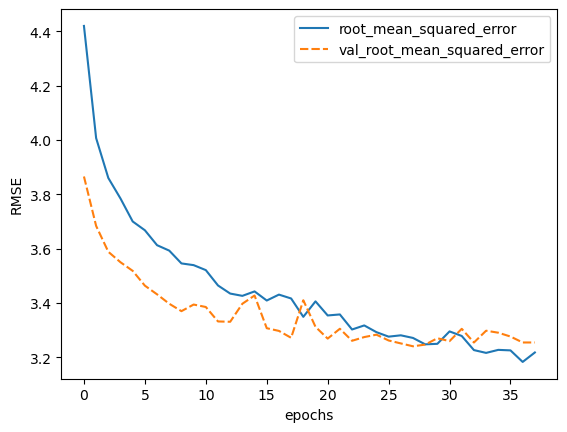

In [67]:
plot_history(['root_mean_squared_error','val_root_mean_squared_error'])

## Batch norm: the standard scaler

In [68]:
from tensorflow.keras.layers import BatchNormalization

In [69]:
def create_nn(nodes1=100, nodes2=50):
    inputs = keras.Input(shape=(X_data.shape[1],), name='input')
    
    # Dense layers
    layers_dense = keras.layers.BatchNormalization()(inputs)
    layers_dense = keras.layers.Dense(nodes1, 'relu')(layers_dense)
    layers_dense = keras.layers.Dense(nodes2, 'relu')(layers_dense)
    
    # Output layer
    outputs = keras.layers.Dense(1)(layers_dense)
    
    return keras.Model(inputs=inputs, outputs=outputs, name='model_batchnorm')

In [70]:
model = create_nn()

In [71]:
compile_model(model)

In [72]:
model.summary()

Model: "model_batchnorm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 89)]              0         
                                                                 
 batch_normalization (BatchN  (None, 89)               356       
 ormalization)                                                   
                                                                 
 dense_15 (Dense)            (None, 100)               9000      
                                                                 
 dense_16 (Dense)            (None, 50)                5050      
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 14,457
Trainable params: 14,279
Non-trainable params: 178
_____________________________________________

## Next steps to further improve model
With unlimited options to modify the model architecture or to play with the training parameters, deep learning can trigger very extensive hunting for better and better results. Usually models are “well behaving” in the sense that small changes to the architectures also only result in small changes of the performance (if any). It is often tempting to hunt for some magical settings that will lead to much better results. But do those settings exist? Applying common sense is often a good first step to make a guess of how much better results could be. In the present case we might certainly not expect to be able to reliably predict sunshine hours for the next day with 5-10 minute precision. But how much better our model could be exactly, often remains difficult to answer.

* What changes to the model architecture might make sense to explore?
* Ignoring changes to the model architecture, what might notably improve the prediction quality?